# **Kmeans**

## 1.1 Fundamentos de la técnica
El algoritmo K-Means es una técnica de aprendizaje no supervisado que agrupa datos en k grupos o clusters según su similitud.
Su objetivo es encontrar patrones ocultos dentro de los datos, asignando cada punto al centroide más cercano.
Cada grupo se representa mediante un centroide, que es el promedio de todos los puntos del cluster.

El algoritmo sigue los siguientes pasos:

Selecciona aleatoriamente k centroides iniciales.

Asigna cada punto al centroide más cercano (según una métrica de distancia, usualmente Euclidiana).

Recalcula los centroides como el promedio de los puntos asignados.

Repite los pasos 2 y 3 hasta que los centroides no cambien significativamente.

## 1.2  Modelo Matemático
El algoritmo K-Means es un método de clustering no supervisado que agrupa los datos en K conjuntos (clusters) basándose en su similitud. Su funcionamiento se apoya en un proceso iterativo que busca minimizar la suma de las distancias cuadradas entre los puntos de datos y el centroide de su respectivo cluster.

Matemáticamente, el objetivo del algoritmo es minimizar la siguiente función de costo:

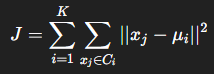

donde:

* 𝐾 es el número de clusters
* 𝑥𝑗 representa los puntos de datos
* 𝜇𝑖 es el centroide del cluster 𝑖
* 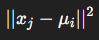 es la distancia euclidiana al cuadrado entre un punto y su centroide.



## 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar Kmeans
En este proyecto se emplean diversas librerías de Python enfocadas en el análisis de datos, aprendizaje automático y visualización:

* NumPy (numpy): se utiliza para manejar estructuras de datos numéricos y realizar operaciones matemáticas eficientes sobre arreglos multidimensionales, como la transformación del ejemplo de entrada al formato requerido por el modelo.

* Pandas (pandas): permite la manipulación y análisis de datos mediante estructuras como DataFrame, que facilitan la exploración, descripción y visualización del conjunto de datos Iris.

* Matplotlib (matplotlib.pyplot): se usa para generar gráficos, en este caso un gráfico de dispersión que permite observar la distribución de las clases del dataset según dos de sus características principales.

* Scikit-learn (sklearn): es la librería principal para el modelado y evaluación del aprendizaje automático.

* load_iris: carga el dataset de flores Iris, ampliamente usado para experimentos de clasificación y clustering.

* StandardScaler: estandariza las variables numéricas para que todas tengan media 0 y desviación estándar 1, lo que mejora el rendimiento del algoritmo de K-Means.

* KMeans: implementa el algoritmo de clustering K-Means, el cual agrupa los datos en tres clusters sin utilizar etiquetas previas.

* confusion_matrix, accuracy_score y ConfusionMatrixDisplay: se utilizan para comparar las etiquetas verdaderas con las asignadas por el modelo, evaluar su precisión y mostrar los resultados de forma visual.

Además, se define la función predict_cluster(model, scaler, sample), la cual recibe un modelo entrenado, el objeto escalador y un ejemplo de entrada. Esta función transforma el ejemplo con el mismo escalado aplicado a los datos de entrenamiento y predice a qué cluster pertenece.

## 1.4 Pipeline


#### Preprocesamiento

En esta sección del código se realiza el preprocesamiento de los datos del conjunto Iris.
Primero, se cargan las características y etiquetas del dataset y se organizan en un DataFrame para facilitar su análisis. Posteriormente, se imprimen estadísticas descriptivas como el promedio, desviación estándar, valores máximos y mínimos de cada variable, lo que permite conocer la distribución y el rango de los datos.

Después, se genera un gráfico de dispersión (scatter plot) que muestra visualmente cómo se distribuyen las muestras en función de las dos primeras características del conjunto, utilizando diferentes colores para representar cada especie de flor. Finalmente, se aplica una normalización de las características mediante StandardScaler(), con el objetivo de escalar los valores numéricos a una misma magnitud. Esto es importante porque K-Means utiliza distancias para agrupar los datos, y sin escalado, las variables con valores mayores podrían dominar el proceso de agrupamiento.

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


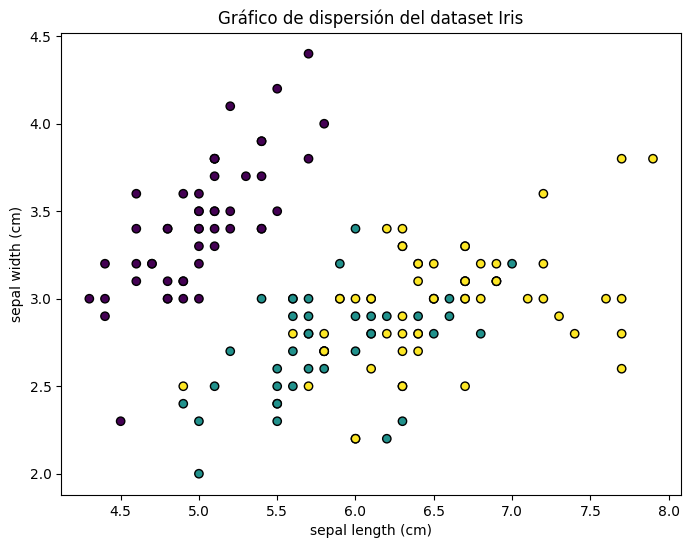

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = [target_names[i] for i in y]


print(df.describe())


plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Gráfico de dispersión del dataset Iris")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Prediction

En esta sección del código se lleva a cabo la etapa de predicción utilizando el modelo K-Means.
Primero, se crea una instancia del modelo KMeans indicando que se desean formar 3 clústeres, ya que el conjunto de datos Iris contiene tres clases distintas de flores. Luego, el modelo se entrena con los datos escalados (X_scaled), identificando los centroides de cada grupo mediante un proceso iterativo que minimiza la distancia entre los puntos y su centroide más cercano.

Posteriormente, se define la función predict_cluster(), la cual recibe un nuevo patrón (muestra) y devuelve el número del clúster asignado por el modelo. La función aplica nuevamente el escalado a la muestra antes de hacer la predicción para mantener la coherencia con los datos de entrenamiento.
Finalmente, se prueba esta función con un ejemplo real del conjunto de datos (X[54]), mostrando en pantalla a qué clúster pertenece la muestra según el modelo entrenado. Esta etapa ilustra cómo se puede usar K-Means para clasificar nuevos datos dentro de los grupos previamente detectados.

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

def predict_cluster(model, scaler, sample):
    sample_scaled = scaler.transform(np.array(sample).reshape(1, -1))
    cluster = model.predict(sample_scaled)[0]
    return cluster


example = X[54]
predicted_cluster = predict_cluster(kmeans, scaler, example)
print("Ejemplo de entrada:", example)
print(f"Cluster asignado: {predicted_cluster}")


Ejemplo de entrada: [6.5 2.8 4.6 1.5]
Cluster asignado: 0


#### Model Evaluation

El modelo K-Means obtuvo una exactitud aproximada del 67 %, lo que indica un desempeño moderado en la tarea de agrupar las flores del conjunto de datos Iris según sus verdaderas especies. Aunque el algoritmo logró identificar correctamente las clases Setosa y Virginica, presentó dificultades para distinguir la clase Versicolor, la cual fue completamente absorbida por otros grupos.

Este comportamiento se explica principalmente por la naturaleza no supervisada del algoritmo K-Means y las características del conjunto de datos. En el caso del Iris dataset, las clases Versicolor y Virginica presentan una superposición significativa en el espacio de características, lo que hace difícil separarlas mediante fronteras lineales basadas únicamente en distancias euclidianas. K-Means, al depender de la forma esférica de los clusters y de la media como punto central, no logra capturar adecuadamente esa complejidad.

Además, el algoritmo es sensible a la inicialización aleatoria de los centroides y a la escala de los datos, lo que puede afectar la calidad final del agrupamiento. En consecuencia, aunque el modelo es útil para una agrupación exploratoria y permite visualizar patrones generales, su rendimiento evidencia que no es la técnica más adecuada cuando las clases no están claramente separadas o presentan fronteras difusas.

En síntesis, el resultado del 67 % de exactitud refleja tanto las limitaciones estructurales del algoritmo K-Means como la complejidad inherente del dataset, mostrando que, si bien logra un agrupamiento básico, no es capaz de replicar con precisión las verdaderas clases biológicas del conjunto de datos Iris.

Accuracy del modelo: 0.6667
Matriz de confusión:
 [[50  0  0]
 [ 4  0 46]
 [ 0  0 50]]


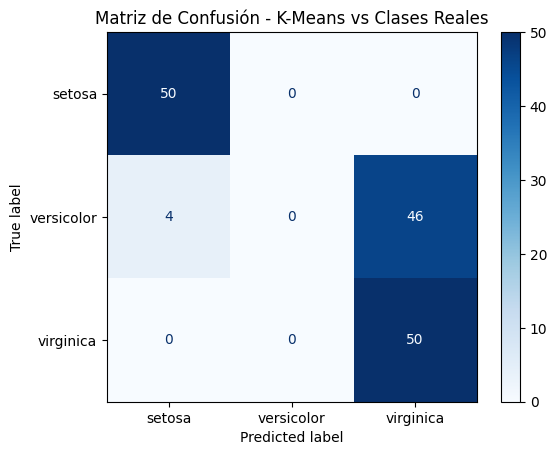

In [23]:

y_pred = kmeans.labels_

from scipy.stats import mode

labels_aligned = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    labels_aligned[mask] = mode(y[mask], keepdims=False).mode

acc = accuracy_score(y, labels_aligned)
cm = confusion_matrix(y, labels_aligned)

print(f"Accuracy del modelo: {acc:.4f}")
print("Matriz de confusión:\n", cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - K-Means vs Clases Reales")
plt.show()



# Referencias

* Dharmaraj. (2022, 26 enero). The Math Behind K-Means Clustering. Medium. https://medium.com/@draj0718/the-math-behind-k-means-clustering-4aa85532085e

* GeeksforGeeks. (2025, 22 agosto). K means Clustering – Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/
